In [95]:
import pandas as pd
import numpy as np
import glob,os
import numpy.fft as nf
import scipy.io.wavfile as wf
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [6]:
df = pd.read_csv('/Users/dan/downloads/音乐节拍检测/1.数据集/芒果TV私有数据集/downbeat/00001.downbeat',header = None)
# df.header = 'timestamp'

In [94]:
path=r'/Users/dan/downloads/音乐节拍检测/1.数据集/芒果TV私有数据集/downbeat'
file=glob.glob(os.path.join(path, "00*.downbeat"))
file.sort()
# print(file)
dl= []
for f in file:
    dl.append(pd.read_csv(f,header = None))
df=pd.concat(dl)
df.rename(columns = {0:'downbeat'},inplace = True)
df.index = list(range(len(df)))
l = [1]
flag = 1
for i in range(1,len(df['downbeat']),1):
    if float(df['downbeat'][i]) > float(df['downbeat'][i-1]):
        l.append(flag)
    else:
        flag += 1
        l.append(flag)
df['song'] = l
df[df.song == 4]

,downbeat,song
34,1.795,4
35,4.961,4
36,8.126,4
37,11.287,4
38,14.447,4
39,17.609,4
40,20.771,4
41,23.903,4
42,27.102,4


In [83]:
path=r'/Users/dan/downloads/音乐节拍检测/1.数据集/芒果TV私有数据集/beat'
file2=glob.glob(os.path.join(path, "00*.beat"))
file2.sort()
# print(file)
dl2= []
for f in file2:
    dl2.append(pd.read_csv(f,header = None))
df2=pd.concat(dl2)
df2.rename(columns = {0:'beat'},inplace = True)
df2.index = list(range(len(df2)))
l = [1]
flag = 1
for i in range(1,len(df2['beat']),1):
    if float(df2['beat'][i]) > float(df2['beat'][i-1]):
        l.append(flag)
    else:
        flag += 1
        l.append(flag)
df2['song'] = l
df2

,beat,song
0,0.120,1
1,0.604,1
2,1.087,1
3,1.571,1
4,2.055,1
...,...,...
5429,27.916,100
5430,28.329,100
5431,28.745,100
5432,29.161,100


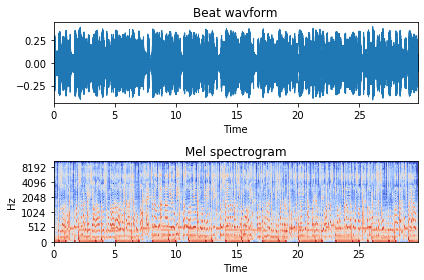

In [132]:
# Load a wav file
y, sr = librosa.load('/Users/dan/downloads/音乐节拍检测/1.数据集/芒果TV私有数据集/wav/00003.wav', sr=None)
# extract mel spectrogram feature
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
# convert to log scale
logmelspec = librosa.power_to_db(melspec)
plt.figure()
# plot a wavform
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr)
plt.title('Beat wavform')
# plot mel spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel spectrogram')
plt.tight_layout() #保证图不重叠
plt.show()

1283